<a href="https://colab.research.google.com/github/sledhead/simple_python/blob/main/opencv_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Will display upload box to user to allow a file to upload and encrypted.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install opencv-contrib-python

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

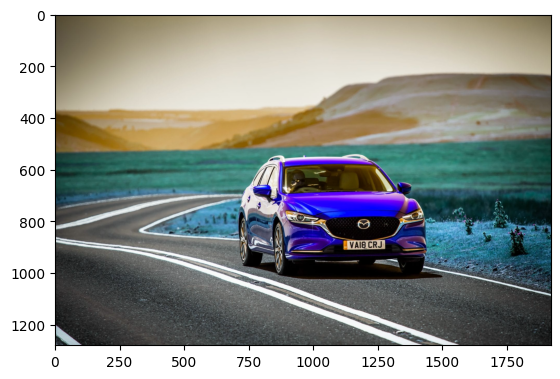

In [81]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
nemo = cv2.imread('/content/drive/MyDrive/Expense_Rec/car_highway.jpg')
plt.imshow(nemo)
plt.show()

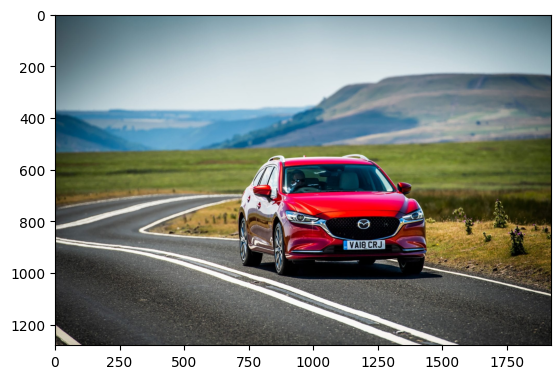

In [82]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [ ]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2GRAY)
plt.imshow(nemo)
plt.show()

In [8]:
len(flags)

346

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

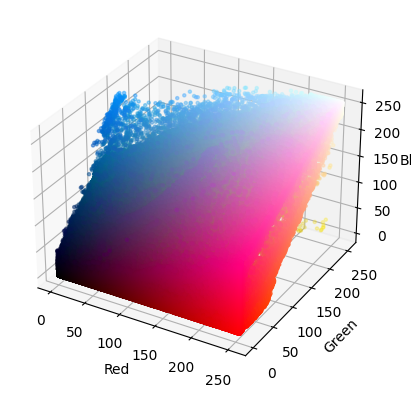

In [83]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [84]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

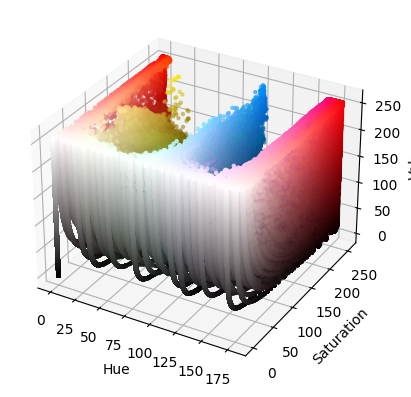

In [85]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [97]:
light_black = (100, 200, 50)
dark_black = (175, 250, 150)
lower_red = np.array([30,150,50])
#upper_red = np.array([255,255,180])
upper_red = np.array([255,255,225])
mask = cv2.inRange(hsv_nemo, lower_red, upper_red)

In [87]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [98]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

In [ ]:
result

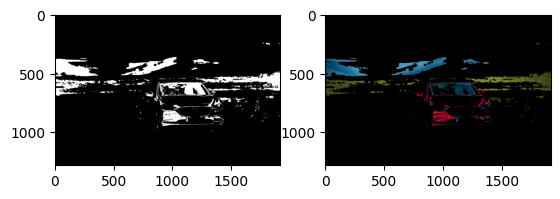

In [99]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
nemo2 = cv2.imread('/content/drive/MyDrive/Expense_Rec/smith_fb_2.png')
plt.imshow(nemo2)
plt.show()

In [ ]:
nemo2 = cv2.cvtColor(nemo2, cv2.COLOR_BGR2RGB)
plt.imshow(nemo2)
plt.show()

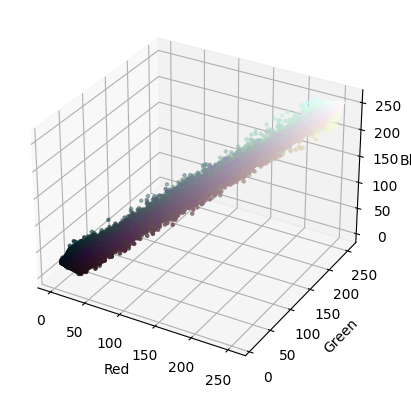

In [181]:
r, g, b = cv2.split(nemo2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo2.reshape((np.shape(nemo2)[0]*np.shape(nemo2)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [182]:
hsv_nemo2 = cv2.cvtColor(nemo2, cv2.COLOR_RGB2HSV)

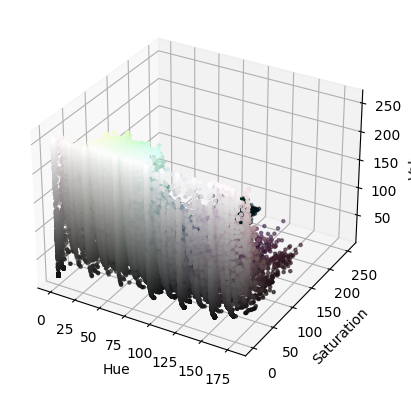

In [183]:
h, s, v = cv2.split(hsv_nemo2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [184]:

lower_red = np.array([5,30,1])
#upper_red = np.array([255,255,180])
upper_red = np.array([255,255,90])
mask2 = cv2.inRange(hsv_nemo2, lower_red, upper_red)

In [185]:
result2 = cv2.bitwise_and(nemo2, nemo2, mask=mask2)

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask2, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result2)
plt.show()

In [115]:
result2.ndim
result2.shape

(1323, 917, 3)

In [119]:
print(type(nemo2))

<class 'numpy.ndarray'>


In [124]:
result2[400,400,:]

array([0, 0, 0], dtype=uint8)

In [128]:
mask2[400,400:425]

array([  0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0, 255,
       255, 255,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0],
      dtype=uint8)

In [131]:
temp_arr = mask2[400,400:405]
temp_arr.max()

0

In [125]:
nemo2[400,400,:]

array([247, 247, 246], dtype=uint8)

In [129]:
result2.shape[0]

1323

In [187]:
#build a dict of hor lines between the different areas
line_num = 'line_'
complete_line_nm = ''
line_dict = {}
line_info = {}
bLookForEndLine = False

for line_id in range(0,result2.shape[0],1):
  #loop each hor line
  test_row_arr = mask2[line_id]
  if( (test_row_arr.max() == 255) and (bLookForEndLine == False) ):
    #found begin line
    line_info = {}
    line_info['start_line'] = line_id
    complete_line_nm = line_num + str(line_id)
    bLookForEndLine = True

  if( (test_row_arr.max() == 0) and (bLookForEndLine == True) ):
    #Found end of box line... record line num and restore search
    line_info['end_line'] = line_id
    line_dict[complete_line_nm] = line_info
    bLookForEndLine = False



In [188]:
print(len(line_dict))
for item in line_dict.items():
  print(item)


#print(line_dict)

21
('line_185', {'start_line': 185, 'end_line': 343})
('line_440', {'start_line': 440, 'end_line': 469})
('line_475', {'start_line': 475, 'end_line': 504})
('line_511', {'start_line': 511, 'end_line': 540})
('line_557', {'start_line': 557, 'end_line': 558})
('line_559', {'start_line': 559, 'end_line': 586})
('line_593', {'start_line': 593, 'end_line': 623})
('line_629', {'start_line': 629, 'end_line': 660})
('line_665', {'start_line': 665, 'end_line': 699})
('line_702', {'start_line': 702, 'end_line': 733})
('line_738', {'start_line': 738, 'end_line': 769})
('line_774', {'start_line': 774, 'end_line': 803})
('line_809', {'start_line': 809, 'end_line': 839})
('line_845', {'start_line': 845, 'end_line': 874})
('line_881', {'start_line': 881, 'end_line': 910})
('line_915', {'start_line': 915, 'end_line': 946})
('line_952', {'start_line': 952, 'end_line': 982})
('line_989', {'start_line': 989, 'end_line': 1018})
('line_1033', {'start_line': 1033, 'end_line': 1065})
('line_1069', {'start_li

In [190]:
nemo2[702:733,:,:]

array([[[252, 252, 252],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [250, 250, 250],
        [252, 252, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [251, 251, 251],
        [249, 249, 249],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[250, 250, 250],
        [251, 251, 251],
        [248, 248, 248],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [248, 248, 248],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 251],
        [248, 248, 248],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [191]:
#output location for each image slice
import os
main_folder_path = '/content/drive/MyDrive/Expense_Rec/slice_output'
file_name_template = 'slice_test_'

for item in line_dict.items():
  print('working on line: ')
  print(item[0])

  #get slice of whole array
  start_index = item[1]['start_line']
  end_index = item[1]['end_line']
  print(f'the start index: {start_index}')
  slice_arr = nemo2[(start_index-2):(end_index+2),:,:]

  #build new file name
  full_file_name = file_name_template + str(start_index) + '.jpg'
  total_path = os.path.join(main_folder_path,full_file_name)
  cv2.imwrite(total_path,slice_arr)

working on line: 
line_185
the start index: 185
working on line: 
line_440
the start index: 440
working on line: 
line_475
the start index: 475
working on line: 
line_511
the start index: 511
working on line: 
line_557
the start index: 557
working on line: 
line_559
the start index: 559
working on line: 
line_593
the start index: 593
working on line: 
line_629
the start index: 629
working on line: 
line_665
the start index: 665
working on line: 
line_702
the start index: 702
working on line: 
line_738
the start index: 738
working on line: 
line_774
the start index: 774
working on line: 
line_809
the start index: 809
working on line: 
line_845
the start index: 845
working on line: 
line_881
the start index: 881
working on line: 
line_915
the start index: 915
working on line: 
line_952
the start index: 952
working on line: 
line_989
the start index: 989
working on line: 
line_1033
the start index: 1033
working on line: 
line_1069
the start index: 1069
working on line: 
line_1113
the star